# Classifying Muffins and Cupcakes with Support Vector Machines (SVM)

__Step 1:__ Import Packages

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

__Step 2:__ Import Data

In [2]:
!pwd

/Users/jingchenli/Desktop/Tutorial2024/Week_02


In [3]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('./muffin_cupcake/recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


__Step 3:__ Prepare the Data

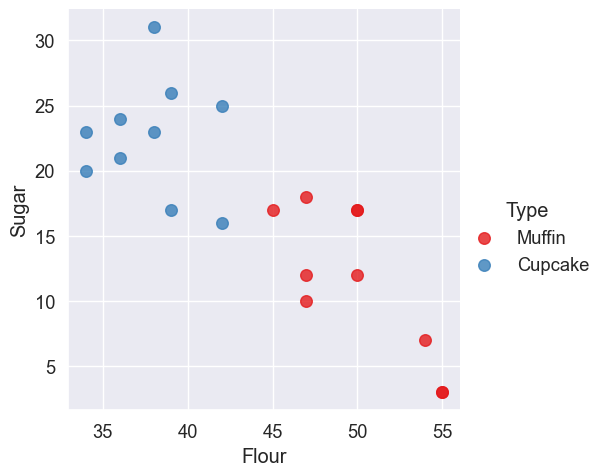

In [4]:
# Plot two ingredients
sns.lmplot(x = 'Flour', y = 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [7]:
# Specify inputs for the model
all_ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']]
ingredients = recipes[['Flour','Sugar']] # X
type_label = np.where(recipes['Type']=='Muffin', 0, 1) # y

type_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
ingredients

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12
5,55,3
6,54,7
7,47,10
8,50,17
9,50,17


__Step 4:__ Fit the Model

In [9]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

More detailed instruction on how to specify the model can be found in [scikit-learn documentation](https://scikit-learn.org/stable/modules/svm.html#classification) 

__Step 5:__ Predict New Case

In [10]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [11]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


/Users/jingchenli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


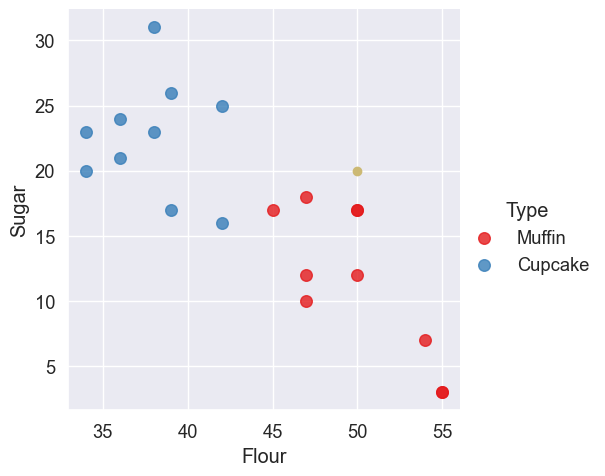

In [12]:
# Plot the point to visually see where the point lies
sns.lmplot(x = 'Flour', y = 'Sugar', data=recipes, hue='Type', palette='Set1', 
           fit_reg=False, scatter_kws={"s": 70})
plt.plot(50, 20, 'yo')

In [13]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20)

You're looking at a cupcake recipe!


/Users/jingchenli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [14]:
model.predict(np.array([[50, 20]]))

/Users/jingchenli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [17]:
[[50, 20], [20, 30]]

[[50, 20], [20, 30]]

In [18]:
np.array([[50, 20], [20, 30]])

array([[50, 20],
       [20, 30]])

In [19]:
model.predict(np.array([[50, 20], [20, 30]]))

/Users/jingchenli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0, 1])

In [25]:
pd.DataFrame([[50, 20]])

,0,1
0,50,20


In [21]:
pd.DataFrame([50, 20])

,0
0,50
1,20


In [19]:
pd.DataFrame([[50, 20]]).shape

(1, 2)

In [20]:
pd.DataFrame([50, 20]).shape

(2, 1)